In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
##Load the dataset
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/temp/diabetes.csv')

#Print the first 5 rows of the dataframe.
#df.head()

url = "https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv"
path = '/content/drive/My Drive/Colab Notebooks/temp/'
filename = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = read_csv(path+filename)
array = df.values
X = array[:,0:8]
y = array[:,8]


In [4]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVC()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())


0.760457963089542


In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(cv_results)
	print(msg)

[0.83116883 0.71428571 0.71428571 0.77922078 0.79220779 0.76623377
 0.68831169 0.85714286 0.80263158 0.76315789]
LR: 0.770865 (0.050905)
[0.80519481 0.75324675 0.71428571 0.79220779 0.79220779 0.77922078
 0.66233766 0.80519481 0.82894737 0.73684211]
LDA: 0.766969 (0.047966)
[0.72727273 0.71428571 0.61038961 0.72727273 0.7012987  0.72727273
 0.66233766 0.77922078 0.78947368 0.67105263]
KNN: 0.710988 (0.050792)
[0.72727273 0.66233766 0.63636364 0.71428571 0.67532468 0.67532468
 0.64935065 0.75324675 0.76315789 0.72368421]
CART: 0.698035 (0.041887)
[0.80519481 0.71428571 0.7012987  0.80519481 0.79220779 0.75324675
 0.71428571 0.76623377 0.80263158 0.73684211]
NB: 0.759142 (0.038960)
[0.79220779 0.75324675 0.71428571 0.79220779 0.77922078 0.77922078
 0.68831169 0.75324675 0.80263158 0.75      ]
SVM: 0.760458 (0.034712)


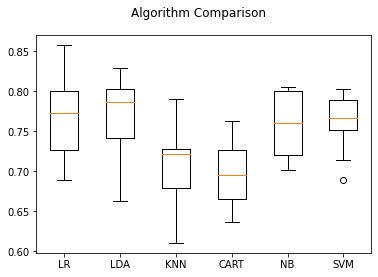

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [18]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = RidgeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, y)

print(param_grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

{'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])}
0.7708333333333334
1.0


In [22]:
# Randomized for Algorithm Tuning
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
model = RidgeClassifier()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, random_state=7)
rsearch.fit(X, y)

print(param_grid)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

{'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1a5bffb350>}
0.7708333333333334
0.07630828937395717
